Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.



Model Summary:
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.024  0.760    56.520     59.595      0.011    0.008    4963.0   
sigma   2.341  0.688     1.286      3.679      0.010    0.008    4823.0   

       ess_tail  r_hat  
mu       4395.0    1.0  
sigma    4574.0    1.0  

95% HDI for μ: <xarray.DataArray 'mu' (hdi: 2)> Size: 16B
array([56.48527902, 59.40550724])
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
95% HDI for σ: <xarray.DataArray 'sigma' (hdi: 2)> Size: 16B
array([1.30620478, 3.5766956 ])
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'


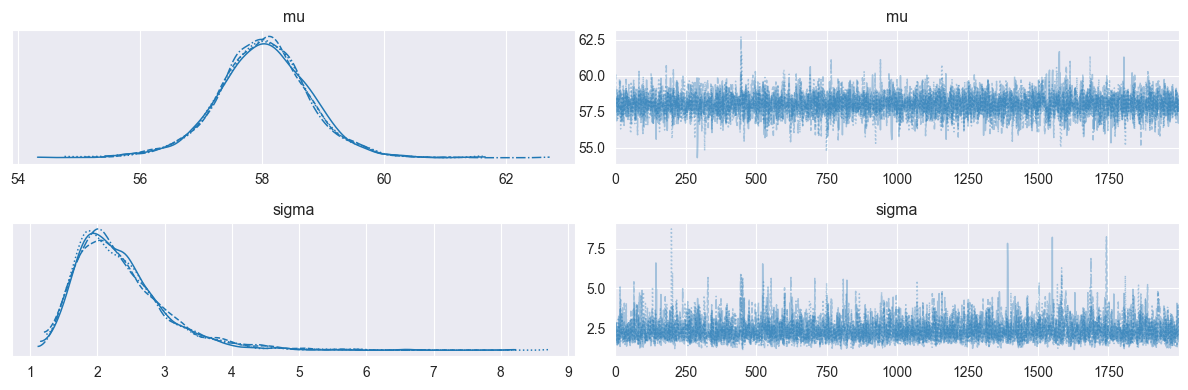

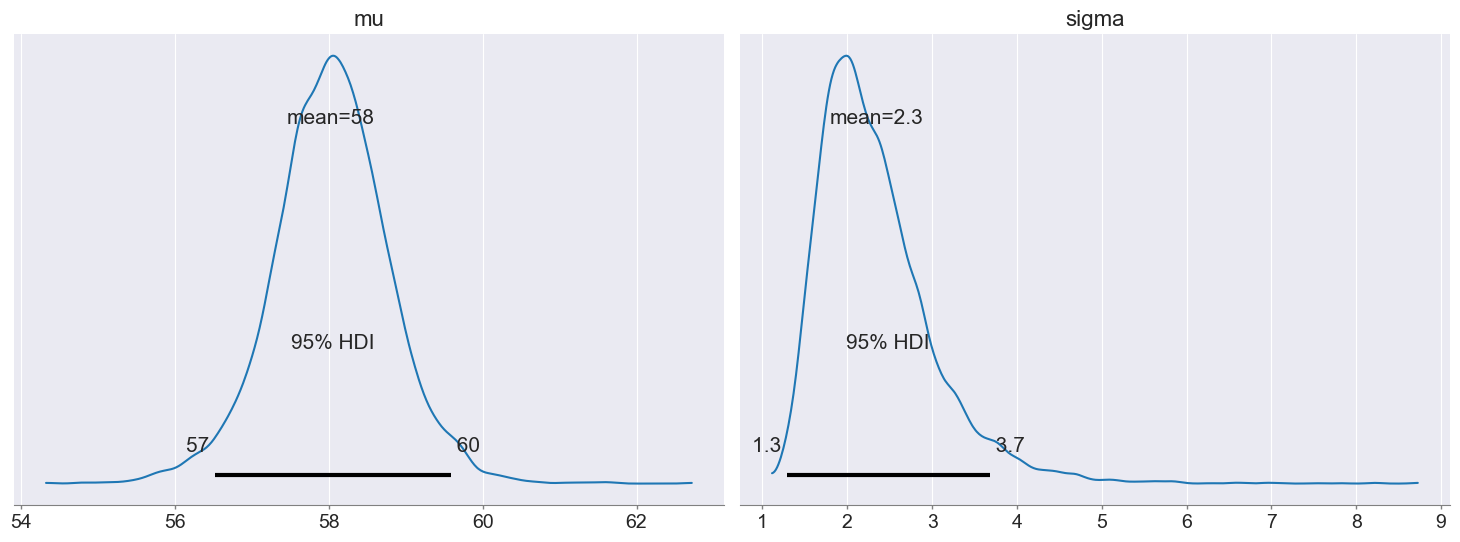

In [5]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Data
noise_levels = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

# For part a), we can use the sample mean as a reasonable choice for x in the prior
x = np.mean(noise_levels)

# Create the model
with pm.Model() as noise_model:
    # Priors
    mu = pm.Normal('mu', mu=x, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)
    
    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=noise_levels)
    
    # Sample
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Print summary statistics
summary = az.summary(trace, hdi_prob=0.95)
print("\nModel Summary:")
print(summary)

# Plotting
az.plot_trace(trace)
plt.tight_layout()

# Plot posterior distributions
az.plot_posterior(trace, hdi_prob=0.95)
plt.tight_layout()

# Get HDI intervals
mu_hdi = az.hdi(trace, var_names=['mu'])
sigma_hdi = az.hdi(trace, var_names=['sigma'])

print("\n95% HDI for μ:", mu_hdi['mu'])
print("95% HDI for σ:", sigma_hdi['sigma'])